<a href="https://colab.research.google.com/github/Pali29/Car_Sale_ML_model/blob/main/Car_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Handling**

## **Imports**

In [212]:
import pandas as pd
import seaborn as sns
import numpy as np
#imported all necessary libraries and main data set in variable data frame as df.

df = pd.read_csv("https://raw.githubusercontent.com/Pali29/ML-datasets/main/used_car_dataset.csv")
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


## **Data Processing**

In [213]:
df = df.sort_values(by='kms_driven')
df.drop('car_name',axis=1,inplace=True)
df = df.fillna(0)
df

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
30,₹ 8 Lakh,"1,00,000 km",Diesel,Hyderabad,2018
612,₹ 3 Lakh,"1,00,000 km",Diesel,Thiruvallur,2012
2064,₹ 6.5 Lakh,"1,00,000 km",Petrol,Hyderabad,2016
1989,₹ 4 Lakh,"1,00,088 km",Petrol,Ambattur,2022
406,₹ 6.95 Lakh,"1,01,000 km",Diesel,Thane,2015
...,...,...,...,...,...
549,₹ 27.5 Lakh,"99,000 km",Diesel,Hyderabad,2016
1769,₹ 2.6 Lakh,"99,203 km",Petrol,Hyderabad,2012
1333,₹ 7.79 Lakh,"99,938 km",Petrol,Bangalore,2018
668,₹ 9.5 Lakh,"99,941 km",Diesel,Ahmedabad,2012


## **Data Cleaning**

In [214]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['city']=le.fit_transform(df['city'])
df['city']=df['city']+1
df['fuel_type']=le.fit_transform(df['fuel_type'])
df['fuel_type']=df['fuel_type']+1

df['car_price_in_rupees'] = df['car_price_in_rupees'].str.replace('₹', '')
df['car_price_in_rupees'] = pd.to_numeric(df['car_price_in_rupees'].str.replace('Lakh', ''), errors='coerce')
df['kms_driven'] = df['kms_driven'].str.replace(',', '')
df['kms_driven'] = pd.to_numeric(df['kms_driven'].str.replace(' km', ''), errors='coerce')
df

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
30,8.00,100000,2,8,2018
612,3.00,100000,2,16,2012
2064,6.50,100000,7,8,2016
1989,4.00,100088,7,2,2022
406,6.95,101000,2,15,2015
...,...,...,...,...,...
549,27.50,99000,2,8,2016
1769,2.60,99203,7,8,2012
1333,7.79,99938,7,3,2018
668,9.50,99941,2,1,2012


## **Data Outliers**

<Axes: ylabel='kms_driven'>

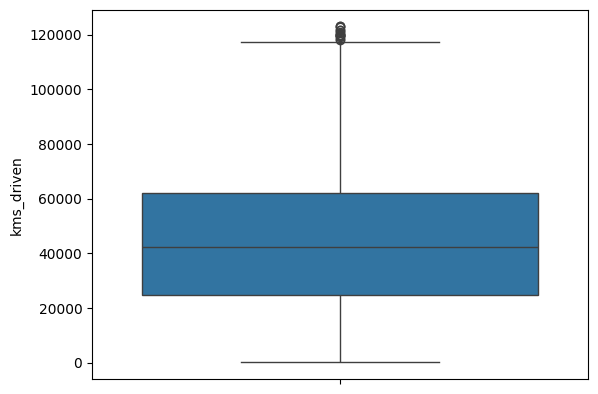

In [215]:
df = df[df['kms_driven']<125000]
sns.boxplot(df['kms_driven'])

# **Model Building**

In [216]:
df = df.dropna()
Y = df["car_price_in_rupees"]
Y = Y.values.reshape(-1, 1)
X = df.drop("car_price_in_rupees", axis=1)

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **SVM**

In [218]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## **Random Forest**

In [219]:
from sklearn.ensemble import RandomForestRegressor
#Create a Gaussian Classifier
rlf=RandomForestRegressor(max_depth=4)
#Train the model using the training sets y_pred=clf.predict(X_test)
rlf.fit(X_train,Y_train)

<ipython-input-219-cb38bee2b9d6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rlf.fit(X_train,Y_train)


RandomForestRegressor(max_depth=4)

# **Evaluation**

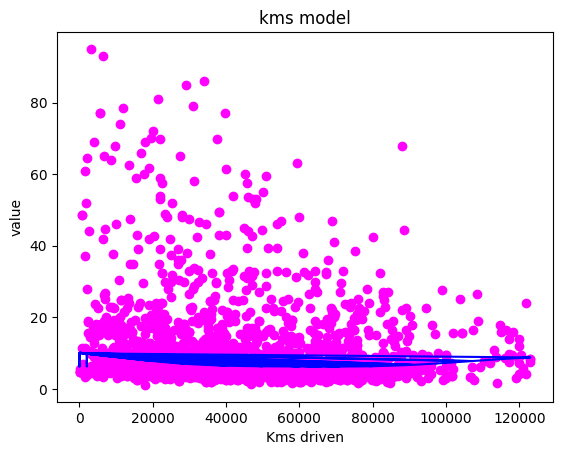

In [220]:
Y_pred_s = svr.predict(X_test)
Y_pred_r = rlf.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(X['kms_driven'], Y, color = 'magenta')
plt.plot(X, svr.predict(X), color = 'blue')
plt.title('kms model')
plt.xlabel('Kms driven')
plt.ylabel('value')
plt.show()

## **Feature scaling the models**

In [221]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xt = sc_X.fit_transform(X)
Yt = sc_Y.fit_transform(Y)
svr.fit(Xt, Yt)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [222]:
X_grid = np.arange(min(Xt[:,0]), max(Xt[:,0]), 0.0005935).reshape(2065,4)
Y_pred_s = sc_Y.inverse_transform ((svr.predict(X_grid).reshape(-1, 1)))

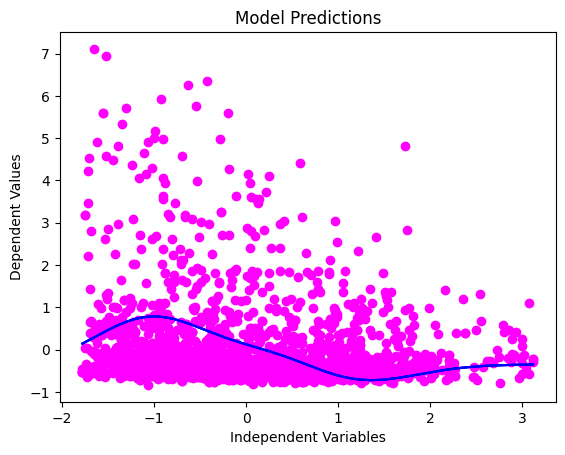

In [223]:
plt.scatter(Xt[:,0], Yt, color = 'magenta')
plt.plot(X_grid, svr.predict(X_grid), color = 'blue')
plt.title('Model Predictions')
plt.xlabel('Independent Variables')
plt.ylabel('Dependent Values')
plt.show()

## **Result**

In [226]:
from sklearn.metrics import mean_squared_error
rfResult = np.sqrt(mean_squared_error(Y_test, Y_pred_r))
SVMResult = np.sqrt(mean_squared_error(Yt, Y_pred_s))

In [235]:
rfresults = pd.DataFrame(["Random Forest", rfResult]).transpose()
svmresults = pd.DataFrame(["SVM Regression", SVMResult]).transpose()
rfresults.columns = ["Method", "Error %"]
svmresults.columns = ["Method", "Error %"]
result = pd.concat([rfresults, svmresults], axis=0)
result.reset_index()
result

,Method,Error %
0,Random Forest,11.415313
0,SVM Regression,11.557213
